In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import utils
from tensorflow.keras import layers, models, utils
from keras.utils import np_utils
from keras.backend import conv2d
import cv2
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

le = preprocessing.LabelEncoder()
display(y_test.shape,y_train.shape)
display(x_test.shape,x_train.shape)

170498071/170498071 [==============================] - 4s 0us/step


(10000, 1)

(50000, 1)

(10000, 32, 32, 3)

(50000, 32, 32, 3)

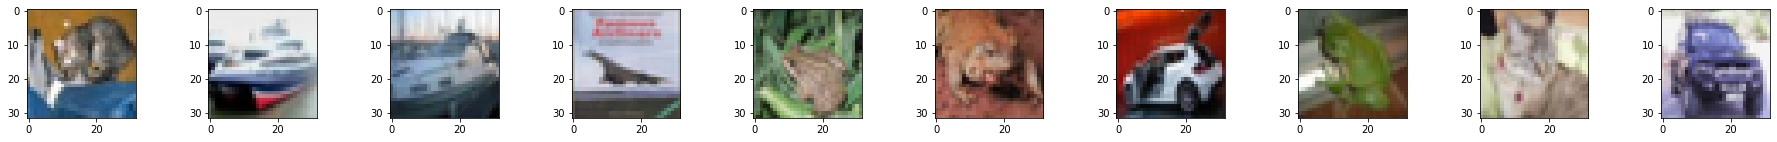

In [ ]:
figure, axis = plt.subplots(1,10)
figure.set_size_inches(32,2)
for i in range(10):
  axis[i].imshow(x_test[i])

# Нормализация данных

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / np.max(x_test)
x_test = x_test / np.max(x_test)
num_train, depth, height, width = x_train.shape
num_test = x_test.shape[0]
num_classes = np.unique(y_train).shape[0]
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
display(x_train[0][0][0])

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# Функции визуализации ошибок, создания, и обучения нейронной сети

In [ ]:
def get_model(iss=False):
  model = Sequential()
  model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(32, (3,3)))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.25))
  if(iss):
    model.add(layers.Conv2D(48, (3,3), padding='same', input_shape=x_train.shape[1:]))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(48, (3,3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(64, (3,3), padding='same', input_shape=x_train.shape[1:]))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(64, (3,3)))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Flatten())
  model.add(layers.Dense(512))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))
  opt=SGD(learning_rate=0.01, momentum=0.9, nesterov=True, decay=1e-6)

  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy','mae'])
  return model

def train(model,n,nt,epoch):
  history = model.fit(x_train[:n],
                    y_train[:n],
                    validation_data=(x_test[:nt], y_test[:nt]),
                    batch_size=128,
                    epochs=epoch)
  return history


def plot_history(history_name):
  plt.figure(figsize=(18,7))
  plt.grid()
  mas_legend = []
  for model,history,name in history_name:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    mas_legend.append('train-{}'.format(name))
    mas_legend.append('test-{}'.format(name))
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(mas_legend, loc='upper left')
  plt.show()

def plot_history2(history_name):
  plt.figure(figsize=(18,7))
  plt.grid()
  mas_legend = []
  for model,history,name in history_name:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    mas_legend.append('train-{}'.format(name))
    mas_legend.append('test-{}'.format(name))
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(mas_legend, loc='upper left')
  plt.show()

# Визуальное предсказание

In [ ]:
class_names = [str(i) for i in range(10)]

def get_predict_plt(model,name,n):
  predict = model.predict(x_test[:10])
  labels = [str(i) for i in range(10)]
  plt.figure(figsize=(30,30))
  print('\n\n\n============================================================================================================================================================')
  print(name)
  print('============================================================================================================================================================')
  for i in range(n):
    plt.subplot(30/n,30/n,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    plt.xlabel("Верный ответ:"+class_names[list(y_test[i]).index(1)] )
  plt.show()
  plt.figure(figsize=(30,30))
  for i in range(n):
    plt.subplot(30/n,30/n,i+1)
    plt.bar([i for i in range(10)],predict[i])
  plt.show()

In [ ]:
display(y_train.shape)
display(y_test.shape)

model_history_names_ = []
for name,seven,epoch in [("5 слоев сверточной сети: 40",False,40),("5 слоев сверточной сети: 70",False,70)]:
  model = get_model(seven)
  history = train(model,5000,1000,epoch)
  model_history_names_.append((model,history,name))


(50000, 10)

(10000, 10)

Epoch 1/40
40/40 [==============================] - 34s 829ms/step - loss: 2.2974 - accuracy: 0.1150 - mae: 0.1798 - val_loss: 2.2755 - val_accuracy: 0.1360 - val_mae: 0.1794
Epoch 2/40
40/40 [==============================] - 30s 743ms/step - loss: 2.2039 - accuracy: 0.1746 - mae: 0.1762 - val_loss: 2.1155 - val_accuracy: 0.2430 - val_mae: 0.1742
Epoch 3/40
40/40 [==============================] - 25s 637ms/step - loss: 2.0453 - accuracy: 0.2532 - mae: 0.1688 - val_loss: 1.9860 - val_accuracy: 0.2840 - val_mae: 0.1663
Epoch 4/40
40/40 [==============================] - 26s 648ms/step - loss: 1.9772 - accuracy: 0.2680 - mae: 0.1658 - val_loss: 1.9296 - val_accuracy: 0.3020 - val_mae: 0.1631
Epoch 5/40
40/40 [==============================] - 28s 688ms/step - loss: 1.9034 - accuracy: 0.3130 - mae: 0.1617 - val_loss: 2.0399 - val_accuracy: 0.2620 - val_mae: 0.1666
Epoch 6/40
40/40 [==============================] - 26s 648ms/step - loss: 1.8512 - accuracy: 0.3280 - mae: 0.1591 - val_loss

In [ ]:
for name,seven,epoch in [("7 слоев сверточной сети: 40",True,40),("7 слоев сверточной сети: 70",True,70)]:
  model = get_model(seven)
  history = train(model,5000,1000,epoch)
  model_history_names_.append((model,history,name))

In [ ]:
model_history_names_[0][0].save('saved_model/my_model1')
model_history_names_[1][0].save('saved_model/my_model2')

# Визуализация

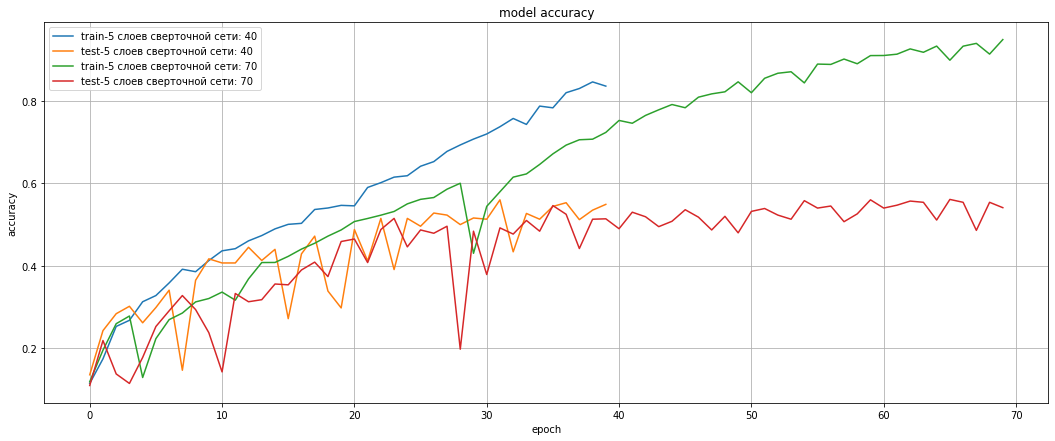

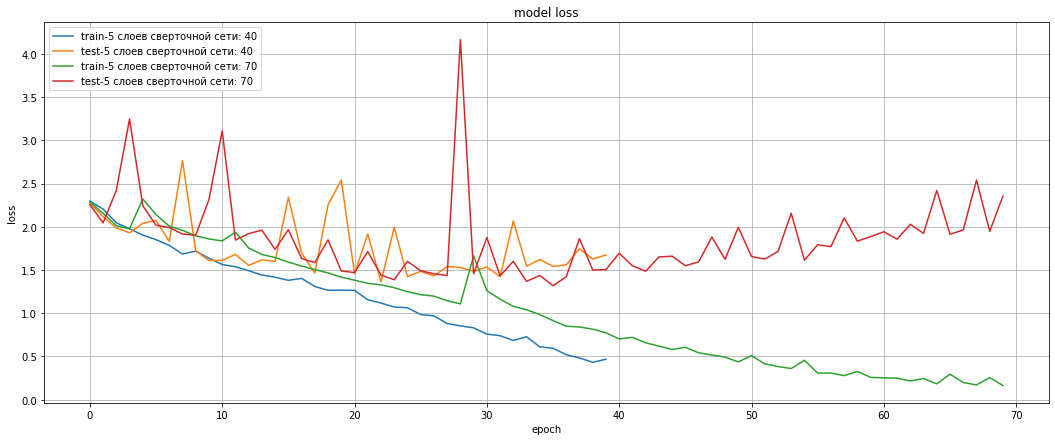

1/1 [==============================] - 0s 33ms/step



5 слоев сверточной сети: 40


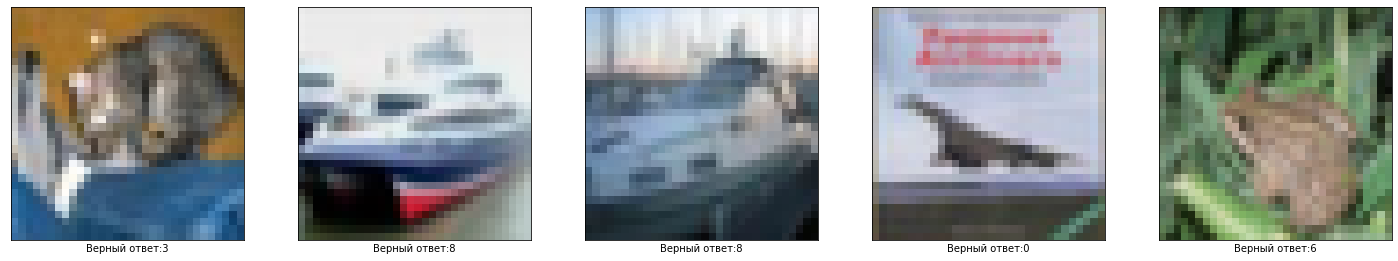

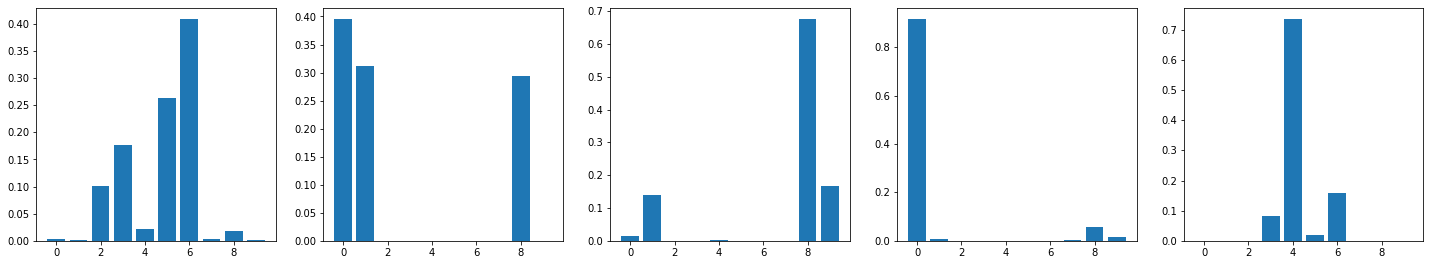

1/1 [==============================] - 0s 36ms/step



5 слоев сверточной сети: 70


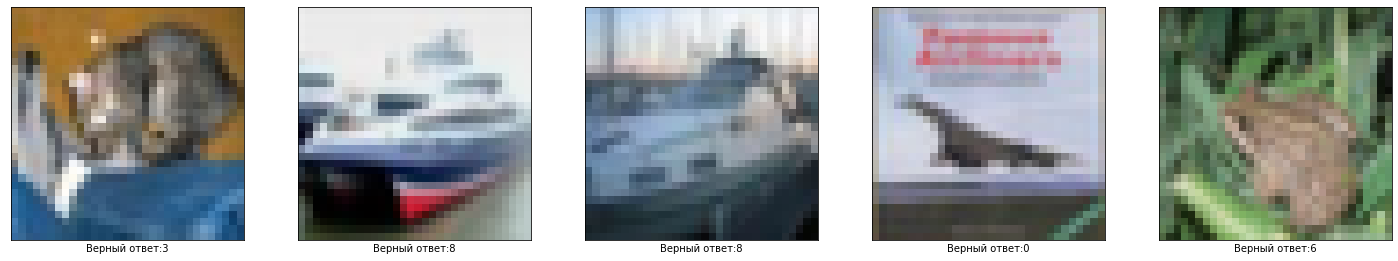

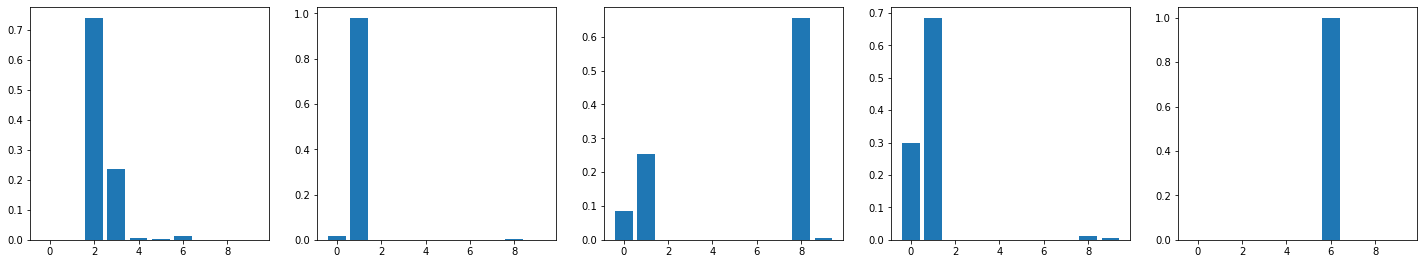

In [ ]:
plot_history(model_history_names_)
plot_history2(model_history_names_)
for model,history,name in model_history_names_:
  get_predict_plt(model,name,5)